In [1]:
# we will try to predict the property prices in Bangalore based on various factors like location , sq ft . ,etc...

Dataset is taken from  : https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline 

In [3]:
# loading the data 
df=pd.read_csv("Bengaluru_House_Data.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
# note that the prices are in lakhs 

In [9]:
# dropping the features that are not required for our model 
df1=df.drop(["area_type","availability","balcony","society"],axis=1)

In [10]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
# exploring the bath column 

In [12]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
# taking a look at all the values where the "bath" values are Nan
df1[df["bath"].isna()==True]

# since we only have 73 rows which have a null value we can fill these values with the median of the bath column

,location,size,total_sqft,bath,price
56,Devanahalli,4 Bedroom,3010 - 3410,NaN,192.000
81,Hennur Road,4 Bedroom,2957 - 3450,NaN,224.500
224,Devanahalli,3 BHK,1520 - 1740,NaN,74.820
344,Kanakpura Road,1 BHK,525,NaN,21.530
579,Sarjapur Road,NaN,1200 - 2400,NaN,34.185
...,...,...,...,...,...
11496,Kanakpura Road,1 BHK,525,NaN,27.000
11569,Hosur Road,NaN,1350,NaN,8.440
12768,Bettahalsoor,5 Bedroom,3210,NaN,353.000
12861,KR Puram,4 BHK,2204 - 2362,NaN,121.000


In [14]:
# filling these Nan values in the "bath" column with median of the data in the "bath" column
df1["bath"].median()

2.0

In [15]:
df1["bath"].fillna(df1["bath"].median(),inplace=True)

In [16]:
# we can now check that no value in the bath column has a NaN value
df1[df1["bath"].isna()==True]

,location,size,total_sqft,bath,price


In [17]:
# handling all the null values 

In [18]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [19]:
# since only 16 rows are there where the size value is 0 we can drop these rows, as 16 is a minimal number as compared to 13000
# rows that we have 

# also since only 1 location is missing we can drop this row as well 
df1.drop(df1.index[df1["size"].isna()==True],inplace=True)
df1.drop(df1.index[df1["location"].isna()==True],inplace=True)

In [20]:
# now we have no null values
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [21]:
# exploring the size column

In [22]:
df1["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [23]:
# extracting the bhk values from the size column 
def get_bhk(x):
    return int(x.split(sep=" ")[0])
    

In [24]:
# created a new column - "BHK" (as an integer)
df1["BHK"]=df1["size"].apply(get_bhk)

In [25]:
df1.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [26]:
df1["BHK"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [27]:
# exploring the total_sqft column 

In [28]:
df1["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [29]:
def check_float(x):
    try:
        return float(x)
    except:
        return x
        

In [30]:
# here we convert some values to float
df1["total_sqft"]=df1["total_sqft"].apply(check_float)

In [31]:
# there are some values like -"xxxx-xxxx" so take the averge of these two numbers and convert the result to float 
# also if the value is not in this form then we simply replace it with a NaN value
def convert_to_float(x):
    if isinstance(x,str)==True:
        val=x.split(" - ")
        if len(val)==2:
            return (float(val[0])+float(val[1]))/2
        else:
            return np.nan
    else:
        return x
        
        
    
    

In [32]:
# example 
isinstance(100,float)

False

In [33]:
# example 
("1203 - 123").split(" - ")

['1203', '123']

In [34]:
# converted most of the values in the "total_sqft" column into float values  
df1["total_sqft"]=df1["total_sqft"].apply(convert_to_float)

In [35]:
df1["total_sqft"].loc[410]

nan

In [36]:
df1.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [37]:
# creating price per sqft column 

In [38]:
df2=df1.copy()

In [39]:
# price per sqft= price in lakhs / total sqft
df2["price_per_sqft"]=(df2["price"]*100000)/(df2["total_sqft"])

In [40]:
df2

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [41]:
# understanding the location column 

In [42]:
len(df2["location"].unique())

1304

In [43]:
df2["location"]=df2["location"].apply(lambda x: x.strip())

In [44]:
location_analysis=df2.groupby(by="location").count().reset_index()

In [45]:
location_analysis=location_analysis[["location","size"]]

In [46]:
location_analysis=location_analysis.sort_values(by="size",ascending=False).reset_index()

In [47]:
location_analysis=location_analysis.drop(columns="index")

In [48]:
df2

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [49]:
# we need to apply dimensionality reduction to reduce the number of locations 
location_analysis

,location,size
0,Whitefield,540
1,Sarjapur Road,397
2,Electronic City,304
3,Kanakpura Road,273
4,Thanisandra,237
...,...,...
1288,1 Giri Nagar,1
1289,"Kanakapura Road,",1
1290,Kanakapura main Road,1
1291,Karnataka Shabarimala,1


In [50]:
# there are 1112 locations with less than 10 data points
len(location_analysis[location_analysis["size"]<=15])

1112

In [51]:
less_than_15_dpts=location_analysis[location_analysis["size"]<=15]

In [52]:
less_than_15_dpts_list=[]
for i in less_than_15_dpts["location"]:
    less_than_15_dpts_list.append(i)

In [53]:
# all the locations that have less than 15 data points we name them as "other locations"

In [54]:
df2["location"]=df["location"].apply(lambda x: "other location" if x in less_than_15_dpts_list else x )

In [55]:
df2["location"].loc[1290]

'Haralur Road'

In [56]:
# we have reduced the number of unique locations to 223 , later it will help as we will be having less dummy variables
len(df2["location"].unique())

223

In [57]:
# outliers removal using domain knowledge

In [58]:
df2[(df2["total_sqft"]/df2["BHK"])<300]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other location,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,other location,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other location,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other location,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other location,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [59]:
# if we look at the above data points some of them do not seem to be correct , how can a 1020 sqft house have 6 bedrooms 
# we remove such outliers on the basis that a bedroom must be 300 sqft or more in area

In [60]:
df3=df2[(df2["total_sqft"]/df2["BHK"])>300]

In [61]:
df3.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [62]:
# price per sq feet outliers 

In [63]:
df3["price_per_sqft"].describe()

count     12331.000000
mean       6211.250024
std        4046.224800
min         267.829813
25%        4200.000000
50%        5268.199234
75%        6827.794562
max      176470.588235
Name: price_per_sqft, dtype: float64

In [64]:
# we will filter out outliers in price per sq feet value using std deviation (assuming that the data has normal distirbution)
# we will be removing data points which are beyond 1 SD for a particular location 

In [65]:
df3["price_per_sqft"]

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 12331, dtype: float64

In [66]:
def ppsqft_outliers_removal(any_df):
    return_df=pd.DataFrame()
    for i,j in any_df.groupby(by="location"):
        m=np.mean(j.price_per_sqft)
        sdn=np.std(j.price_per_sqft)
        part_df=j[(j.price_per_sqft>(m-sdn)) & (j.price_per_sqft<=(m+sdn))]
        return_df=pd.concat([return_df,part_df],ignore_index=True)
    return return_df

In [67]:
df4=ppsqft_outliers_removal(df3)

In [68]:
df4.shape

(10154, 7)

In [69]:
# histogram for price per sq feet 

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

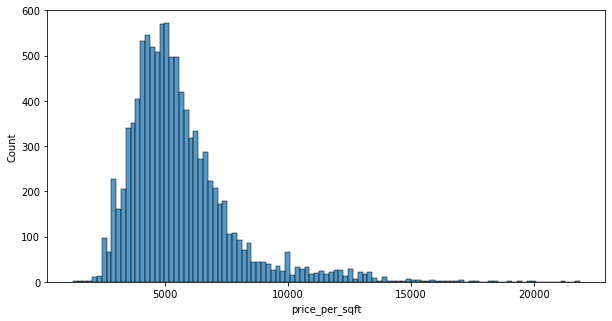

In [70]:
# we can see that it is some-what normally distributed 
plt.figure(figsize=(10,5))
sns.histplot(data=df4,x=df4["price_per_sqft"])

In [71]:
# removing the bathroom column outliers

<AxesSubplot:xlabel='bath', ylabel='Count'>

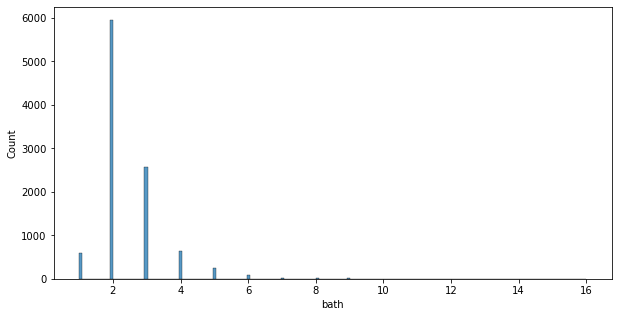

In [72]:
# we can see that it is some-what normally distributed 
plt.figure(figsize=(10,5))
sns.histplot(data=df4,x=df4["bath"])

In [73]:
df5=df4[df4.bath>(df4.BHK+2)]

In [74]:
type(df4["bath"])

pandas.core.series.Series

In [75]:
type(df4.bath)

pandas.core.series.Series

In [76]:
df5

,location,size,total_sqft,bath,price,BHK,price_per_sqft
6204,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
7947,other location,6 BHK,11338.0,9.0,1000.0,6,8819.897689
8978,other location,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
9743,other location,4 Bedroom,7000.0,8.0,450.0,4,6428.571429


In [77]:
# we remove bathrooms on the basis that a property cannot have more than "bedrooms+2" bathrooms in it 
# for example a 6 bedroom flat, it is very unusual to have more than 8 bathrooms in it
df5=df4[df4.bath<(df4.BHK+2)]

In [78]:
df5

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Devarabeesana Halli,3 BHK,1672.0,3.0,150.00,3,8971.291866
1,Devarabeesana Halli,3 BHK,1750.0,3.0,149.00,3,8514.285714
2,Devarabeesana Halli,3 BHK,1750.0,3.0,150.00,3,8571.428571
3,Devarachikkanahalli,3 BHK,1250.0,2.0,44.00,3,3520.000000
4,Devarachikkanahalli,2 BHK,1250.0,2.0,40.00,2,3200.000000
...,...,...,...,...,...,...,...
10149,other location,3 BHK,1440.0,2.0,63.93,3,4439.583333
10150,other location,4 BHK,2200.0,3.0,80.00,4,3636.363636
10151,other location,2 BHK,1200.0,2.0,140.00,2,11666.666667
10152,other location,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [79]:
# now we have our cleaned data with which we can train our model 
df_for_ml=df5.drop(labels=["size","price_per_sqft"],axis=1)

In [80]:
df_for_ml

,location,total_sqft,bath,price,BHK
0,Devarabeesana Halli,1672.0,3.0,150.00,3
1,Devarabeesana Halli,1750.0,3.0,149.00,3
2,Devarabeesana Halli,1750.0,3.0,150.00,3
3,Devarachikkanahalli,1250.0,2.0,44.00,3
4,Devarachikkanahalli,1250.0,2.0,40.00,2
...,...,...,...,...,...
10149,other location,1440.0,2.0,63.93,3
10150,other location,2200.0,3.0,80.00,4
10151,other location,1200.0,2.0,140.00,2
10152,other location,1075.0,2.0,48.00,2


In [81]:
# linear regression model 

In [82]:
# getting dummy variables for the location columns 
dummy_df=pd.get_dummies(df_for_ml["location"])
dummy_df.head()

,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other location
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
df7=pd.concat([df_for_ml,dummy_df.drop(axis=1,labels=["other location"])],axis=1)

In [84]:
df7.shape

(10065, 204)

In [85]:
df7

,location,total_sqft,bath,price,BHK,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,...,"Varthur Road,",Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Devarabeesana Halli,1672.0,3.0,150.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarabeesana Halli,1750.0,3.0,149.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarabeesana Halli,1750.0,3.0,150.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1250.0,2.0,44.00,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1250.0,2.0,40.00,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10149,other location,1440.0,2.0,63.93,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10150,other location,2200.0,3.0,80.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10151,other location,1200.0,2.0,140.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10152,other location,1075.0,2.0,48.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df8=df7.drop(axis=1,labels=["location"])

In [87]:
df8

,total_sqft,bath,price,BHK,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,...,"Varthur Road,",Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1672.0,3.0,150.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,149.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,150.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1250.0,2.0,44.00,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,40.00,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10149,1440.0,2.0,63.93,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10150,2200.0,3.0,80.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10151,1200.0,2.0,140.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10152,1075.0,2.0,48.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df8.shape

(10065, 203)

In [89]:
X=df8.drop(["price"],axis="columns")
y=df8["price"]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [91]:
lrm=LinearRegression()
lrm.fit(X_train.values,y_train.values)


LinearRegression()

In [92]:
# our model is lrm 
lrm.score(X_test.values,y_test.values)

0.7646598433240739

In [93]:
# so basically our r square value is 0.77 which means that 77 times out of 100 , 
# the variation in price can be correctly explained by our model 


In [94]:
len(lrm.coef_)

202

In [95]:
np.where(X.columns=="Electronic City")[0][0]

71

In [96]:
# this function helps us predict price of the house  
def get_prediction(sqft,bathrooms,bhk_val,location):
    
    indx_of_location=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bathrooms
    x[2]=bhk_val
    if indx_of_location>=0:
        x[indx_of_location]=1
    return lrm.predict([x])[0]
    

In [97]:
get_prediction(1000,2,3,"Electronic City")

34.132993784526704

In [98]:
get_prediction(2000,2,3,"Electronic City")

107.40451555699447

In [99]:
get_prediction(2000,2,3,"Indira Nagar")

232.08323947119868